In [1]:
#pandasの準備
import pandas as pd
#データ読み込み
review = pd.read_csv("08_all_year_JP_レビュー詳細_Amazon.csv")
review.head()

,ページUrl,ASIN,Id,投稿日,星,名前,レビュー_タイトル,レビュー,役に立った
0,https://www.amazon.co.jp/Crest-Outlast-Mouthwa...,B07KKL4861,R2GBV5BJBZ7XW1,2023年1月12日,5つ星のうち4.0,k s,NaN,他と比べて余り違いが無いのでもっと他にも試してみようと思ってます。;,NaN
1,https://www.amazon.co.jp/Crest-Outlast-Mouthwa...,B07KKL4861,RUFT16ILW2PCZ,2022年12月30日,5つ星のうち5.0,SK,NaN,コンビニ等で購入するよりも安く更に購入即時使えて便利です;,NaN
2,https://www.amazon.co.jp/Crest-Outlast-Mouthwa...,B07KKL4861,R31O6MFZ428QUM,2022年12月26日,5つ星のうち5.0,Lotspots,NaN,自分のMicrosoftアカウントでファミリー管理している\n子供のMicrosoftアカウ...,5人
3,https://www.amazon.co.jp/Crest-Outlast-Mouthwa...,B07KKL4861,RDCGXYBJDFKIQ,2022年11月23日,5つ星のうち1.0,Amazon カスタマー,NaN,PCのマイクラに課金しようとしたがうまく出来なかった。1日経過したらNintendo Swi...,NaN
4,https://www.amazon.co.jp/Crest-Outlast-Mouthwa...,B0BV2F7P92,RSVQF5L2KGVMK,2023年6月14日,5つ星のうち5.0,Amazonカスタマー,NaN,VIVA 塊魂！ 楽しい～;,NaN


In [2]:
#欠損値を確認
#レビュータイトルなし、役に立った人数が0人だと空欄(=欠損値)になっている
review.isna().sum()

ページUrl           0
ASIN             0
Id               0
投稿日              0
星                0
名前               4
レビュー_タイトル    13324
レビュー             0
役に立った         3606
dtype: int64

In [3]:
#欠損値をなくす(エラーになるから)
#参考(https://note.nkmk.me/python-pandas-nan-fillna/)

#Nan = "なし"と置き換える
review= review.fillna("なし")

#欠損値を再度確認する
review.isna().sum()

ページUrl       0
ASIN         0
Id           0
投稿日          0
星            0
名前           0
レビュー_タイトル    0
レビュー         0
役に立った        0
dtype: int64

In [4]:
#星の部分をfloat型に変換する
#数値のデータにしておかないと後でエラーになる(該当部分で説明します)

for i in range(len(review)):
    s = review["星"].iloc[i]#レビュー毎に星部分を参照
    s = s[6:]#「5つ星のうち3.0」->「3.0」
    s = float(s)#小数点を含むのでintではなくfloat
    review["星"].iloc[i] = s#レビュー毎にデータを置き換える

In [5]:
#レビューの長さを計算
#length:commentの長さ　を追加する
review["length"] = review["レビュー"].str.len()
review.head()
#s = len(review)
#print(s)

,ページUrl,ASIN,Id,投稿日,星,名前,レビュー_タイトル,レビュー,役に立った,length
0,https://www.amazon.co.jp/Crest-Outlast-Mouthwa...,B07KKL4861,R2GBV5BJBZ7XW1,2023年1月12日,4.0,k s,なし,他と比べて余り違いが無いのでもっと他にも試してみようと思ってます。;,なし,34
1,https://www.amazon.co.jp/Crest-Outlast-Mouthwa...,B07KKL4861,RUFT16ILW2PCZ,2022年12月30日,5.0,SK,なし,コンビニ等で購入するよりも安く更に購入即時使えて便利です;,なし,29
2,https://www.amazon.co.jp/Crest-Outlast-Mouthwa...,B07KKL4861,R31O6MFZ428QUM,2022年12月26日,5.0,Lotspots,なし,自分のMicrosoftアカウントでファミリー管理している\n子供のMicrosoftアカウ...,5人,682
3,https://www.amazon.co.jp/Crest-Outlast-Mouthwa...,B07KKL4861,RDCGXYBJDFKIQ,2022年11月23日,1.0,Amazon カスタマー,なし,PCのマイクラに課金しようとしたがうまく出来なかった。1日経過したらNintendo Swi...,なし,79
4,https://www.amazon.co.jp/Crest-Outlast-Mouthwa...,B0BV2F7P92,RSVQF5L2KGVMK,2023年6月14日,5.0,Amazonカスタマー,なし,VIVA 塊魂！ 楽しい～;,なし,14


<BarContainer object of 13324 artists>

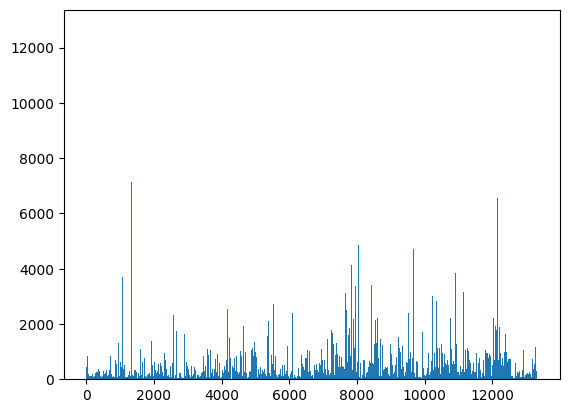

In [6]:
#ヒストグラムの描画
#matplotlib.pyplot：グラフを作れるモジュール
import matplotlib.pyplot as plt

#x軸リストの作成(0-3000で10刻み)
left = []
for i in range(13324):
  left.append(i)

#y軸リストをsurveyのlengthから作る
#参考(https://biotech-lab.org/articles/4896)
list_length = review["length"].to_list()
plt.bar(left, list_length, width=5.0)

In [7]:
#mecabの準備
#mecab：形態素解析に使うモジュール
#!pip install mecab-python3 unidic-lite
import MeCab
tagger = MeCab.Tagger()

RuntimeError: 
----------------------------------------------------------

Failed initializing MeCab. Please see the README for possible solutions:

    https://github.com/SamuraiT/mecab-python3#common-issues

If you are still having trouble, please file an issue here, and include the
ERROR DETAILS below:

    https://github.com/SamuraiT/mecab-python3/issues

issueを英語で書く必要はありません。

------------------- ERROR DETAILS ------------------------
arguments: 
[ifs] no such file or directory: c:\Users\yhira\anaconda3\envs\only-pip\Lib\site-packages\unidic\dicdir\mecabrc
----------------------------------------------------------


In [ ]:
#目的：前レビューの名詞リスト「all_words」を作成する


#助詞「の」「で」を抜く(以前実行した際に名詞に含まれてしまっていた為)
stop_words = ["の", "で"]
all_words = []
parts = ["名詞"]

#形態素解析をし、名詞に該当する単語をall_wordsというリストに格納していく(for文でまわる)
for n in range(len(review)):
    text = review["レビュー"].iloc[n]#1つずつレビューを指定(for文で回る)
    words = tagger.parse(text).splitlines()#形態素解析する
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue#1文解析ごとにEOSと表示される、空白
        word_tmp = i.split()[0]#レビューの単語区切り要素
        if len(i.split()) >= 4:#単語が品詞要素を持つなら
          part = i.split()[4].split("-")[0]#単語ごとの品詞　#名詞-普通名詞-一般
          if not (part in parts):continue#名詞でなければリストに入れない
          for i in range(len(stop_words)):
            if word_tmp in stop_words[i]:continue#「stop_words」にいたら入れない
          words_arr.append(word_tmp)#↑にひっかからなかった要素が「words_arr」に追加される
    all_words.extend(words_arr)#1レビュー分終わったら、「all_words」に「words_arr」をくっつける


#「words_arr」->レビューごとの名詞単語リスト
#「all_words」->全レビューの名詞単語リスト(↑をどんどんくっつけている)

In [ ]:
#頻出単語表を作成する

#データフレームに格納
#データフレーム：2次元の表形式に処理
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})#「all_words」の長さ分だけ1のリストを作る

#countを単語毎に集計する
#groupby：同じ値(=単語)を持つデータをまとめる
#今回はwordsについて同じ値を持つものをまとめ、sum(=合計)を取っている
all_words_df = all_words_df.groupby("words").sum()

#表示
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#all_words_df.sort_values("count", ascending=False)


In [ ]:
#結果をcsvで出力
all_words_df.to_csv("08_1年分_元頻出単語.csv")

ここで↑の出力結果を一度お見せします。    
スライドに戻ります。

In [ ]:
#変更部分のみコメントを追加する
stop_words = ["の", "で"]
all_words = []
parts = ["名詞"]
star = []#星を入れるリストの準備


for n in range(len(review)):
    text = review["レビュー"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        #print(i.split())
        if len(i.split()) >= 4:
          part = i.split()[4].split("-")[0]
          if not (part in parts):continue
          for i in range(len(stop_words)):
            if word_tmp in stop_words[i]:continue
          words_arr.append(word_tmp)
          s = review["星"].iloc[n]#単語に対応するレビューの星部分を参照
          star.append(s)#↑を「star」に加える
    all_words.extend(words_arr)

In [ ]:
#↑がうまくいっているか確認
#新たにstarという星の列が追加されている
all_words_df = pd.DataFrame({"words":all_words, "star":star, "count":len(all_words)*[1]})
all_words_df.head()

,words,star,count
0,他,4.0,1
1,違い,4.0,1
2,他,4.0,1
3,コンビニ,5.0,1
4,購入,5.0,1


In [ ]:
#↑を単語毎に集計する
#mean：平均_sum：合計
words_star = all_words_df.groupby("words").mean()["star"]#starをfloatにしておかないとここでエラーになる
words_count = all_words_df.groupby("words").sum()["count"]
words_df = pd.concat([words_star, words_count], axis = 1)#axis=1：列方向で

words_df.head()

,star,count
words,,
0,2.585366,82
00,5.000000,4
000,2.547619,42
0040,1.000000,2
0083,3.000000,1


In [ ]:
#↑をcountの多い順に並び替える
df_star = words_df.sort_values("count", ascending=False)
df_star.head(20)

,star,count
words,,
ゲーム,3.477880,8341
こと,3.487692,5200
プレイ,3.662227,4580
ストーリー,3.628953,4048
キャラ,3.283447,3214
人,3.536260,3144
2,3.360989,2953
時間,3.642199,2929
購入,4.056987,2755


In [ ]:
df_star.mean()

star      3.441383
count    23.315840
dtype: float64

In [ ]:
df_star.count()

star     18883
count    18883
dtype: int64

In [ ]:
#count上位100個をstarの高い順に並び替える
df_star_100 = df_star.head(100)
df_star_100 = df_star_100.sort_values("star", ascending=False)

In [ ]:
df_star_100.head(50)

,star,count
words,,
プレゼント,4.579310,725
最高,4.434889,814
日,4.298292,761
ソニック,4.133032,1105
子供,4.114155,1533
購入,4.056987,2755
世界,3.940933,1693
気,3.822320,2043
Switch,3.775676,740


In [ ]:
#結果をcsvで出力
df_star_100.to_csv("08_満足度top100(count100位制限).csv")

In [ ]:
#変更部分のみコメントを追加する
stop_words = ["の", "で"]
all_words = []
parts = ["名詞"]
star = []#星を入れるリストの準備


for n in range(len(review)):
    text = review["レビュー"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        #print(i.split())
        if len(i.split()) >= 4:
          part = i.split()[4].split("-")[0]
          if not (part in parts):continue
          for i in range(len(stop_words)):
            if word_tmp in stop_words[i]:continue
          words_arr.append(word_tmp)
          s = review["星"].iloc[n]#単語に対応するレビューの星部分を参照
          star.append(s)#↑を「star」に加える
    all_words.extend(words_arr)


#↑がうまくいっているか確認
#新たにstarという星の列が追加されている
all_words_df = pd.DataFrame({"words":all_words, "star":star, "count":len(all_words)*[1]})


#↑を単語毎に集計する
#mean：平均_sum：合計
words_star = all_words_df.groupby("words").mean()["star"]#starをfloatにしておかないとここでエラーになる
words_count = all_words_df.groupby("words").sum()["count"]
words_df = pd.concat([words_star, words_count], axis = 1)#axis=1：列方向で


#↑をcountの多い順に並び替える
df_star = words_df.sort_values("count", ascending=False)
df_star.head(20)

,star,count
words,,
ゲーム,3.477880,8341
こと,3.487692,5200
プレイ,3.662227,4580
ストーリー,3.628953,4048
キャラ,3.283447,3214
人,3.536260,3144
2,3.360989,2953
時間,3.642199,2929
購入,4.056987,2755
